### **Predicción del precio de una Acción con Series de Tiempo Univariadas**

El análisis de series de tiempo comprende métodos para analizar datos de series de tiempo con el fin de extraer estadísticas significativas y otras características de los datos. El pronóstico de series temporales es el uso de un modelo para predecir valores futuros basados ​​en valores observados previamente.
Las series de tiempo se usan ampliamente para datos no estacionarios, como la economía, el clima, el precio de las acciones 

In [1]:
import os
from datetime import datetime
import pandas_datareader.data as web
import numpy as np
import pandas as pd
wft = web.DataReader("FB", 
                       start='2015-01-01', 
                       end='2020-06-20', 
                       data_source='yahoo')
wft.head(5)


D:\Usuarios\OSCAGAAl\Anaconda3\envs\PROYECTOS_SURA\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,78.930000,77.699997,78.580002,78.449997,18177500,78.449997
2015-01-05,79.250000,76.860001,77.980003,77.190002,26452200,77.190002
2015-01-06,77.589996,75.360001,77.230003,76.150002,27399300,76.150002
2015-01-07,77.360001,75.820000,76.760002,76.150002,22045300,76.150002
2015-01-08,78.230003,76.080002,76.739998,78.180000,23961000,78.180000


In [2]:
wft['2018-01-01':'2020-06-20']

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-02,181.580002,177.550003,177.679993,181.419998,18151900,181.419998
2018-01-03,184.779999,181.330002,181.880005,184.669998,16886600,184.669998
2018-01-04,186.210007,184.100006,184.899994,184.330002,13880900,184.330002
2018-01-05,186.899994,184.929993,185.589996,186.850006,13574500,186.850006
2018-01-08,188.899994,186.330002,187.199997,188.279999,17994700,188.279999
...,...,...,...,...,...,...
2020-06-15,233.770004,224.800003,225.089996,232.500000,15340300,232.500000
2020-06-16,238.460007,233.000000,237.139999,235.649994,15236700,235.649994
2020-06-17,237.589996,231.729996,235.000000,235.529999,19552800,235.529999


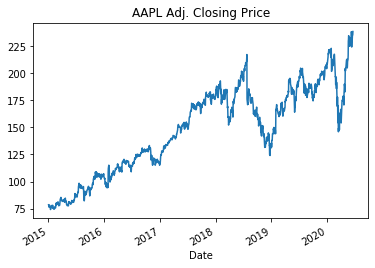

In [3]:
wft['Adj Close'].plot(title='AAPL Adj. Closing Price')

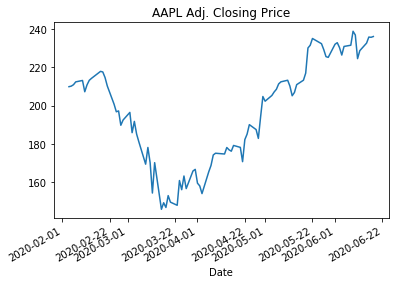

In [4]:
wft['Adj Close']['2020-02-04':'2020-06-18'].plot(title='AAPL Adj. Closing Price')

**Cierre de mes**

In [5]:
wft.asfreq('M', method='ffill')

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-31,78.160004,75.750000,78.000000,75.910004,42649500,75.910004
2015-02-28,81.230003,78.620003,80.680000,78.970001,30739200,78.970001
2015-03-31,83.500000,82.209999,82.900002,82.220001,19734300,82.220001
2015-04-30,80.959999,78.320000,80.010002,78.769997,28999000,78.769997
2015-05-31,80.070000,78.879997,79.949997,79.190002,16134600,79.190002
...,...,...,...,...,...,...
2020-01-31,208.690002,201.059998,208.429993,201.910004,31359900,201.910004
2020-02-29,192.740005,181.820007,182.699997,192.470001,32583500,192.470001
2020-03-31,170.929993,164.199997,165.479996,166.800003,23676300,166.800003


In [6]:
# Valores al cierre de cada mes (días laborales).
wft.asfreq('BM')

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-30,78.160004,75.750000,78.000000,75.910004,42649500.0,75.910004
2015-02-27,81.230003,78.620003,80.680000,78.970001,30739200.0,78.970001
2015-03-31,83.500000,82.209999,82.900002,82.220001,19734300.0,82.220001
2015-04-30,80.959999,78.320000,80.010002,78.769997,28999000.0,78.769997
2015-05-29,80.070000,78.879997,79.949997,79.190002,16134600.0,79.190002
...,...,...,...,...,...,...
2020-01-31,208.690002,201.059998,208.429993,201.910004,31359900.0,201.910004
2020-02-28,192.740005,181.820007,182.699997,192.470001,32583500.0,192.470001
2020-03-31,170.929993,164.199997,165.479996,166.800003,23676300.0,166.800003


In [7]:
# valores al cierre de cada trimestre
wft.asfreq('BQ')

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-03-31,83.500000,82.209999,82.900002,82.220001,19734300.0,82.220001
2015-06-30,86.699997,85.570000,86.599998,85.769997,23016500.0,85.769997
2015-09-30,90.019997,88.010002,88.440002,89.900002,36169100.0,89.900002
2015-12-31,106.169998,104.620003,106.000000,104.660004,18391100.0,104.660004
2016-03-31,115.010002,113.769997,114.699997,114.099998,21207500.0,114.099998
2016-06-30,115.180000,113.669998,114.669998,114.279999,23192700.0,114.279999
2016-09-30,128.589996,127.449997,128.029999,128.270004,18402900.0,128.270004
2016-12-30,116.830002,114.769997,116.599998,115.050003,18684100.0,115.050003
2017-03-31,142.630005,141.889999,142.309998,142.050003,11478300.0,142.050003


In [8]:
wft.isnull().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [9]:
wft["Date"] = wft.index

In [10]:
wft.head(3)

,High,Low,Open,Close,Volume,Adj Close,Date
Date,,,,,,,
2015-01-02,78.930000,77.699997,78.580002,78.449997,18177500,78.449997,2015-01-02
2015-01-05,79.250000,76.860001,77.980003,77.190002,26452200,77.190002,2015-01-05
2015-01-06,77.589996,75.360001,77.230003,76.150002,27399300,76.150002,2015-01-06


### **Análisis mensual**

con resample puedes agrupar por el periodo que quieras


<img src="https://miro.medium.com/max/1400/1*Y7Hkvh5afvVPOjDttCqcvQ.png" width=600, align = "center">

In [11]:
y = wft['Adj Close'].resample('MS').mean()

In [12]:
y ['2020':]

Date
2020-01-01    216.643333
2020-02-01    207.505263
2020-03-01    165.747727
2020-04-01    177.003335
2020-05-01    216.549001
2020-06-01    232.671332
Freq: MS, Name: Adj Close, dtype: float64

### **Visualización de datos de series tiempo**

Algunos patrones distinguibles aparecen cuando graficamos los datos. La serie temporal tiene un patrón de estacionalidad, como que las acciones  siempre son bajas al comienzo del año y altas al final del año. Siempre hay una tendencia al alza en cualquier año.

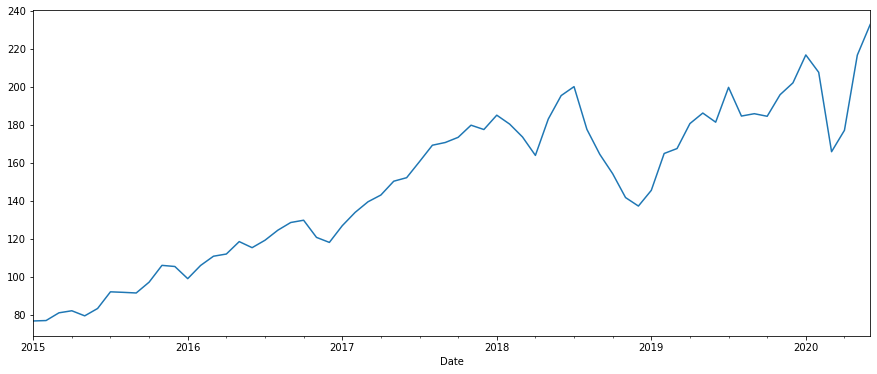

In [13]:
import matplotlib.pyplot as plt

y.plot (figsize = (15, 6)) 
plt.show()

## **Descomponer la Serie**

También podemos visualizar nuestros datos utilizando un método llamado descomposición de series temporales que nos permite descomponer nuestras series temporales en tres componentes distintos: tendencia, estacionalidad y ruido.


In [14]:
from pylab import rcParams
import statsmodels.api as sm

rcParams['figure.figsize'] = 18, 8

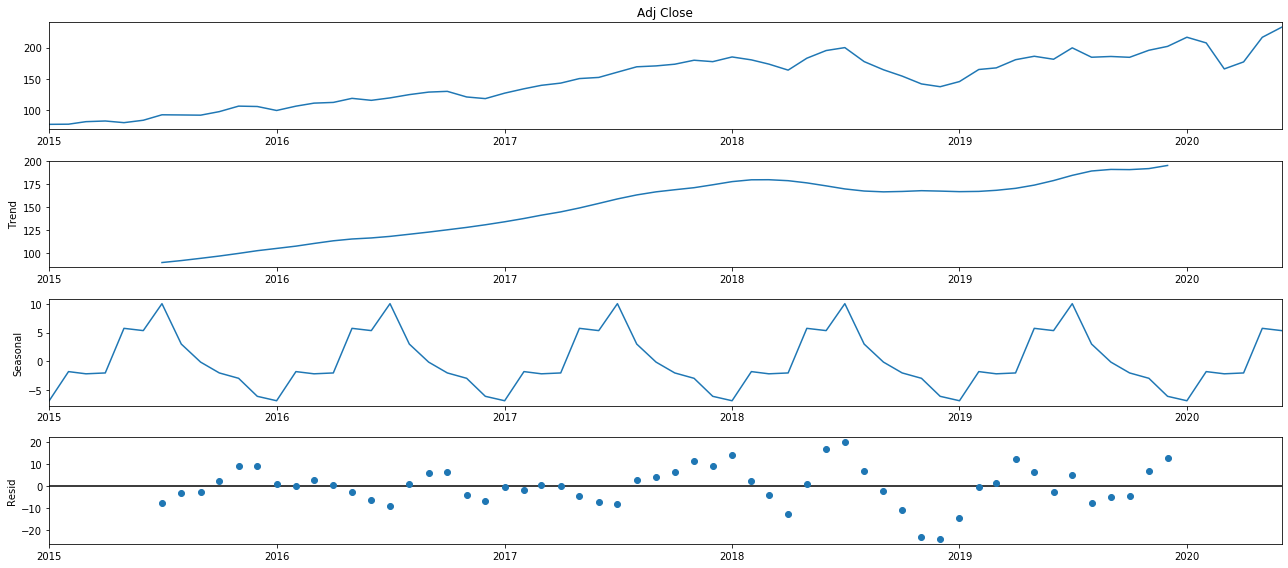

In [15]:
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

La trama anterior muestra claramente que las acciones son inestables, junto con su evidente estacionalidad.

### **Predicción de series de tiempo con ARIMA**

Vamos a aplicar uno de los métodos más utilizados para el pronóstico de series de tiempo, conocido como ARIMA, que significa Autoregressive Integrated Moving Average.
Los modelos ARIMA se denotan con la notación ARIMA(p, d, q). Estos tres parámetros explican la estacionalidad, tendencia y ruido en los datos:

In [16]:
import itertools
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


Nuestro objetivo aquí es utilizar una "búsqueda de cuadrícula" para encontrar el conjunto óptimo de parámetros que produzca el mejor rendimiento para nuestro modelo





In [17]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,order=param,seasonal_order=param_seasonal,enforce_stationarity=False, enforce_invertibility=False)
            results = mod.fit()
            print("ARIMA{}x{}12 - AIC:{}".format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:841.8362956954268
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:656.4466792027646
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:530.4472571888475
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:416.16187348772684
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:520.3752459924712
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:495.7327739622782
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:425.6662483568609
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:424.25039749265153
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:750.6047769722305
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:581.5306087520644
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:464.9897434000814
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:364.3847803890336
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:466.8715685824335
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:438.9193617514299
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:381.32769296756356
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:355.4524716005893
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:493.37935002381016
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:411.90862573582024
ARIMA

D:\Usuarios\OSCAGAAl\Anaconda3\envs\PROYECTOS_SURA\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)



ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:333.9620251812544
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:419.4903242937787
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:424.65167563789726
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:323.570638840513
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:325.56667374908085
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:490.5165541953923
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:410.27115613458426
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:415.9374003547996
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:322.40093338476254
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:416.9597209033921
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:409.30688385312544
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:324.17597728645336
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:318.95759977981174
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:491.70799845709007
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:410.4762226875968
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:420.27079005454624
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:323.4831681817067
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:410.3267972126397
A

**Adaptando el modelo ARIMA**

In [18]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6354      0.298     -2.129      0.033      -1.220      -0.051
ma.L1          0.8280      0.206      4.018      0.000       0.424       1.232
ar.S.L12      -0.8508      0.302     -2.813      0.005      -1.444      -0.258
ma.S.L12       0.0044      0.363      0.012      0.990      -0.707       0.715
sigma2       136.8992     28.888      4.739      0.000      80.281     193.518


**Siempre debemos ejecutar diagnósticos del modelo para investigar cualquier comportamiento inusual.**

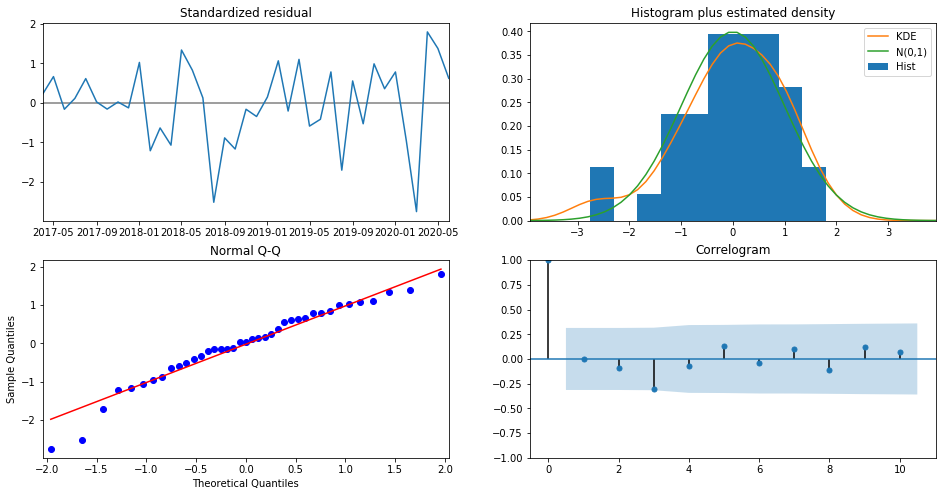

In [19]:
results.plot_diagnostics(figsize=(16,8))
plt.show()

No es perfecto, sin embargo, nuestros diagnósticos del modelo sugieren que los residuos del modelo están casi distribuidos normalmente

**Validar pronósticos**

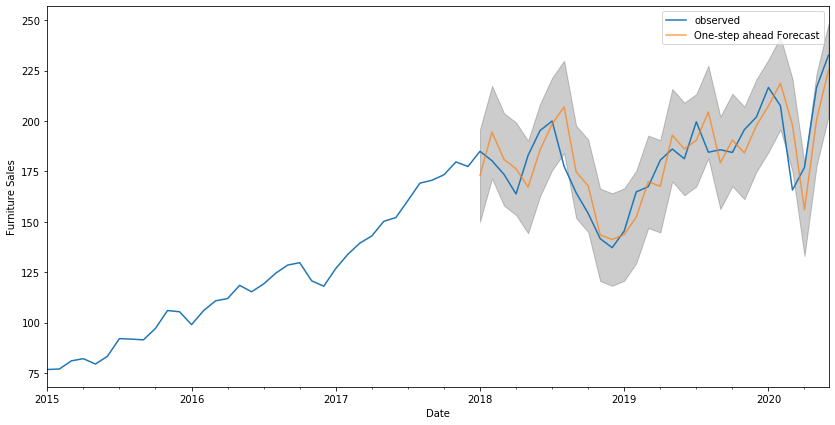

In [20]:
import pandas as pd
pred = results.get_prediction(start=pd.to_datetime('2018-01-01'), dynamic=False)
pred_ci = pred.conf_int()

ax = y['2015':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

El gráfico de líneas muestra los valores observados en comparación con las predicciones de pronóstico continuo. En general, nuestros pronósticos se alinean muy bien con los valores verdaderos, mostrando una tendencia al alza que comienza desde el comienzo del año y captura la estacionalidad hacia el final del año

**Error cudaratico**

In [21]:
y_forecasted = pred.predicted_mean
y_forecasted

Date
2018-01-01    172.953392
2018-02-01    194.454330
2018-03-01    180.919788
2018-04-01    176.330916
2018-05-01    167.243300
2018-06-01    185.571349
2018-07-01    198.486097
2018-08-01    206.942619
2018-09-01    174.749190
2018-10-01    167.860280
2018-11-01    143.515339
2018-12-01    141.187630
2019-01-01    143.665405
2019-02-01    152.335402
2019-03-01    169.820342
2019-04-01    167.638070
2019-05-01    192.952239
2019-06-01    186.128649
2019-07-01    190.412199
2019-08-01    204.435253
2019-09-01    179.221759
2019-10-01    190.563634
2019-11-01    184.132725
2019-12-01    197.741687
2020-01-01    207.466846
2020-02-01    218.731451
2020-03-01    197.971629
2020-04-01    155.951939
2020-05-01    200.405251
2020-06-01    225.383111
Freq: MS, dtype: float64

In [22]:
y_forecasted = pred.predicted_mean
y_forecasted

Date
2018-01-01    172.953392
2018-02-01    194.454330
2018-03-01    180.919788
2018-04-01    176.330916
2018-05-01    167.243300
2018-06-01    185.571349
2018-07-01    198.486097
2018-08-01    206.942619
2018-09-01    174.749190
2018-10-01    167.860280
2018-11-01    143.515339
2018-12-01    141.187630
2019-01-01    143.665405
2019-02-01    152.335402
2019-03-01    169.820342
2019-04-01    167.638070
2019-05-01    192.952239
2019-06-01    186.128649
2019-07-01    190.412199
2019-08-01    204.435253
2019-09-01    179.221759
2019-10-01    190.563634
2019-11-01    184.132725
2019-12-01    197.741687
2020-01-01    207.466846
2020-02-01    218.731451
2020-03-01    197.971629
2020-04-01    155.951939
2020-05-01    200.405251
2020-06-01    225.383111
Freq: MS, dtype: float64

**error**

In [23]:
y_forecasted = pred.predicted_mean
y_truth = y['2018-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 173.44


In [24]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 13.17


**Producciendo Pronosticos Futuros**

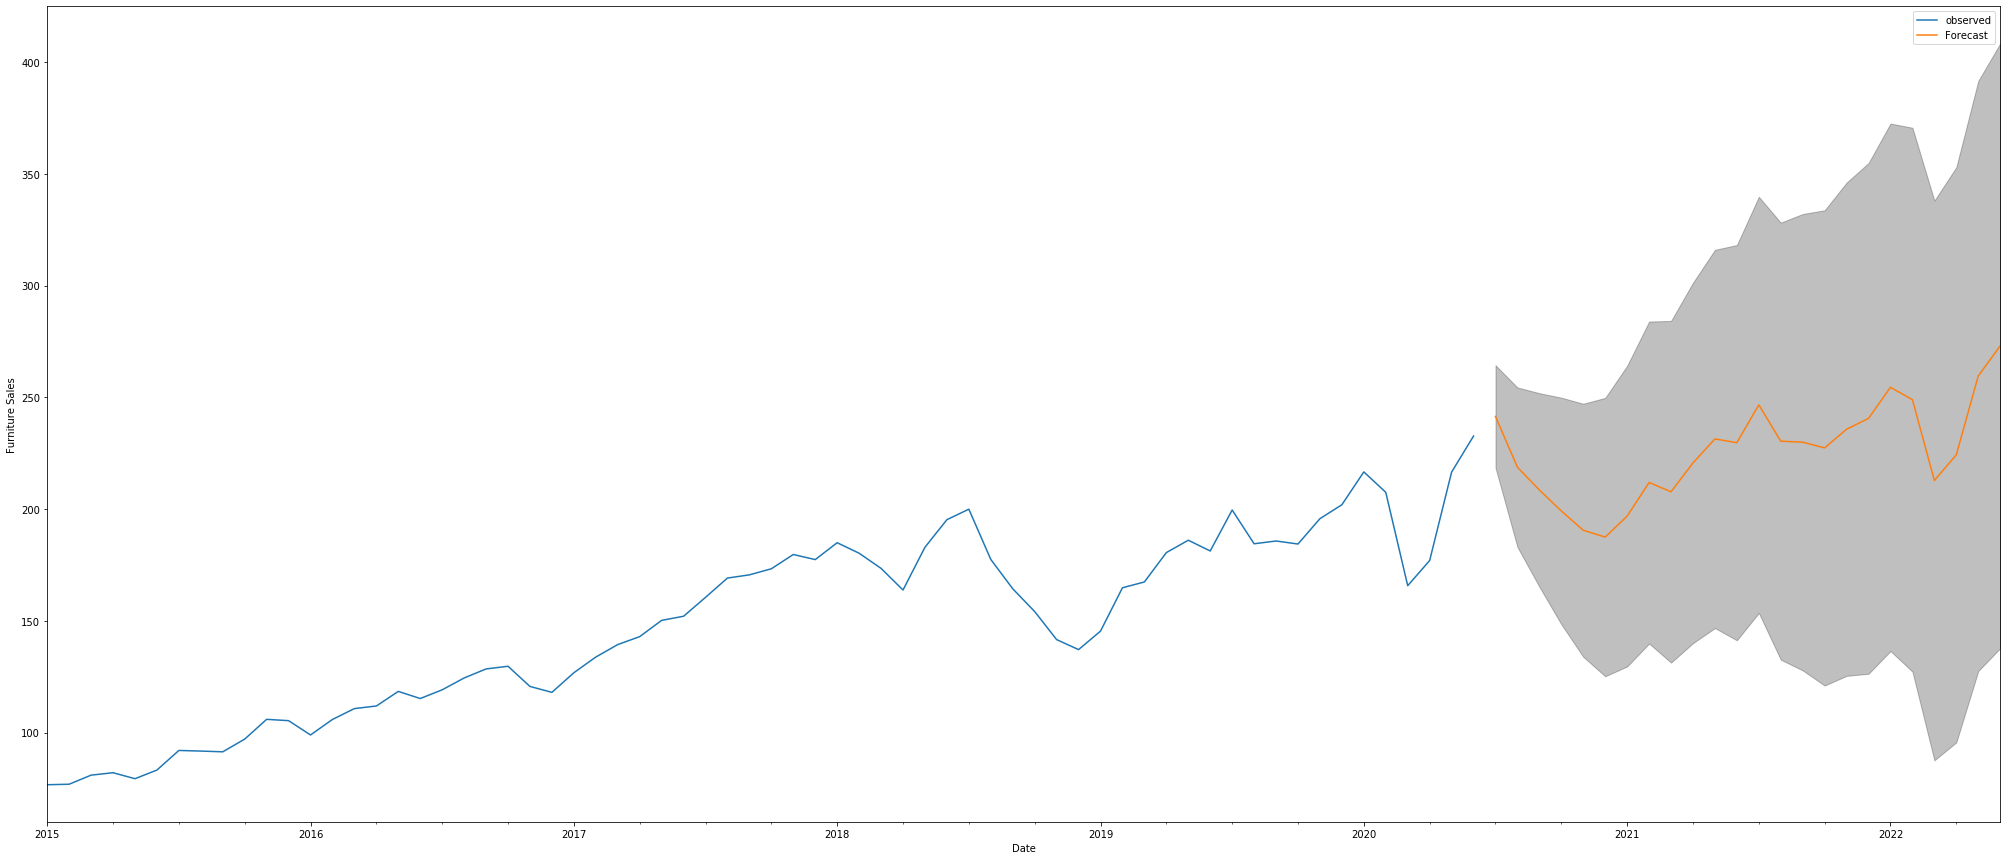

In [25]:
pred_uc = results.get_forecast(steps=24)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(35, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [26]:
proy = pred_uc.predicted_mean
proy = pd.DataFrame(proy)
proy.columns = ['Proyeccion']


## Valores reales
proy1 = pd.DataFrame(y_truth)
proy1.columns = ['Proyeccion']
proy1.info()
print(proy1.head(3))

data = pd.concat([proy1,proy])
data

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 30 entries, 2018-01-01 to 2020-06-01
Freq: MS
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Proyeccion  30 non-null     float64
dtypes: float64(1)
memory usage: 480.0 bytes
            Proyeccion
Date                  
2018-01-01  184.962856
2018-02-01  180.269473
2018-03-01  173.489522


,Proyeccion
2018-01-01,184.962856
2018-02-01,180.269473
2018-03-01,173.489522
2018-04-01,163.810476
2018-05-01,182.930000
2018-06-01,195.267620
2018-07-01,199.967142
2018-08-01,177.492172
2018-09-01,164.377368
2018-10-01,154.187826


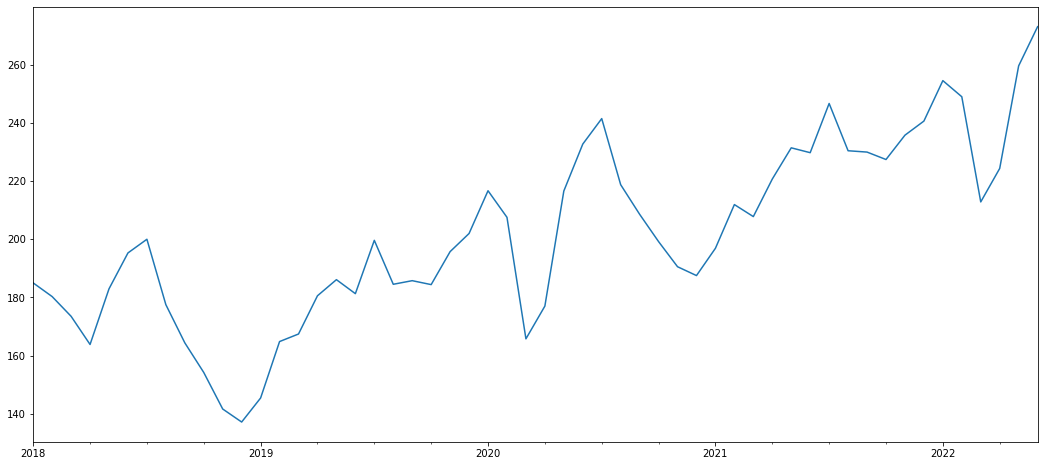

In [27]:
data['Proyeccion'].plot(label='Forecast')

In [28]:
pred_ci

,lower Adj Close,upper Adj Close
2020-07-01,218.498361,264.363060
2020-08-01,183.021829,254.405554
2020-09-01,165.233197,251.865207
2020-10-01,148.472192,249.849857
2020-11-01,133.925934,247.134883
2020-12-01,125.233523,249.741602
2021-01-01,129.612760,264.127730
2021-02-01,139.868594,283.902652
2021-03-01,131.337642,284.175628
2021-04-01,140.035285,301.271551


**Exportar Resultados**

In [30]:
data.to_excel ('Prediciiones.xlsx')